## Introduction

In [1]:
import numpy as np 
import tensorflow as tf

In [2]:
# create input layer
inputs = tf.keras.layers.Input(shape = (784,)) # a 784 dimensional vector
print(f"shape: {inputs.shape}")
print(f"dtype: {inputs.dtype}")

shape: (None, 784)
dtype: <dtype: 'float32'>


In [3]:
# Just for demonstration purposes
img_inputs = tf.keras.layers.Input(shape = (32,32,3))
print(f"shape: {img_inputs.shape}")
print(f"dtype: {img_inputs.dtype}")

shape: (None, 32, 32, 3)
dtype: <dtype: 'float32'>


In [4]:
# Create a dense layer
dense = tf.keras.layers.Dense(64,activation = 'relu')
x = dense(inputs)
print(f"shape: {x.shape}")
print(f"dtype: {x.dtype}")

shape: (None, 64)
dtype: <dtype: 'float32'>


In [7]:
x = tf.keras.layers.Dense(64,activation = 'relu')(x)
outputs = tf.keras.layers.Dense(10)(x)

In [8]:
# create the model
model = tf.keras.Model(inputs= inputs,outputs = outputs,name = 'mnist_model')
# summary the model
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [9]:
for layer in model.layers:
    print(layer.name,layer.trainable)

input_1 True
dense True
dense_1 True
dense_3 True
dense_4 True


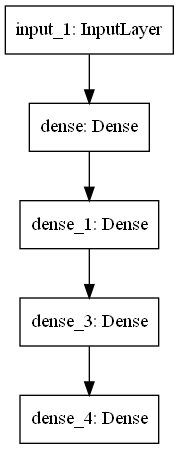

In [10]:
tf.keras.utils.plot_model(model,"my_first_model.png")

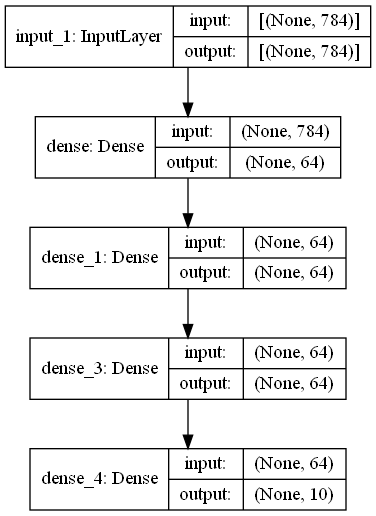

In [11]:
tf.keras.utils.plot_model(model,"my_first_model_with_shape_info.png",show_shapes =True)

In [12]:
# Download dataset mnist -> preprocess(reshape,normalize) -> compile -> train
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

# preprocess and normalize
x_train = x_train.reshape(60000,784).astype("float32") /255.
x_test = x_test.reshape(10000,784).astype("float32")/ 255.

# Display output
print(f"One sample y: {y_train[0]}")

# compile the model mutli classification 
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.RMSprop(),
             metrics= ['accuracy'])
# train the model
history = model.fit(x_train,y_train,
                    #validation_data = (x_test,y_test),
                    #validation_steps = len(y_test),
                    validation_split = 0.2,
                    verbose = 1,
                    batch_size = 64,
                    epochs = 5)

One sample y: 5
Epoch 1/5
750/750 [==============================] - 5s 5ms/step - loss: 2.3377 - accuracy: 0.1760 - val_loss: 2.1730 - val_accuracy: 0.2308
Epoch 2/5
750/750 [==============================] - 3s 5ms/step - loss: 2.2617 - accuracy: 0.1670 - val_loss: 2.2813 - val_accuracy: 0.1716
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 2.3019 - accuracy: 0.1214 - val_loss: 2.3024 - val_accuracy: 0.1295
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 2.3026 - accuracy: 0.1202 - val_loss: 2.3024 - val_accuracy: 0.1295
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 2.3026 - accuracy: 0.1202 - val_loss: 2.3024 - val_accuracy: 0.1295


In [13]:
# Evaluate the model
test_scores = model.evaluate(x_test,y_test,verbose = 1)
print('Test loss: ',test_scores[0])
print('Test accuracy: ',test_scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 2.3024 - accuracy: 0.1217
Test loss:  2.302360773086548
Test accuracy:  0.1216999962925911


In [14]:
# Save your model
model.save("mnist_model")
del model # delete your model

INFO:tensorflow:Assets written to: mnist_model\assets


In [15]:
# Reload your model
model = tf.keras.models.load_model("mnist_model")

## Use the same graph of layers to define multiple models

In [16]:
# Build encoder model
encoder_input = tf.keras.layers.Input(shape = (28,28,1),name = 'img')
x = tf.keras.layers.Conv2D(16,3,activation = 'relu')(encoder_input)
x = tf.keras.layers.Conv2D(32,3,activation = 'relu')(x)
x = tf.keras.layers.MaxPooling2D(3,name = 'maxpool')(x)
x = tf.keras.layers.Conv2D(32,3,activation = 'relu')(x)
x = tf.keras.layers.Conv2D(16,3,activation = 'relu')(x)
encoder_output = tf.keras.layers.GlobalMaxPooling2D()(x)

encoder = tf.keras.Model(encoder_input,encoder_output,name = 'encoder')
encoder.summary()

# Build decoder model
x = tf.keras.layers.Reshape((4,4,1))(encoder_output)
x = tf.keras.layers.Conv2DTranspose(16,3,activation = "relu")(x)
x = tf.keras.layers.Conv2DTranspose(32,3,activation = 'relu')(x)
x = tf.keras.layers.UpSampling2D(3)(x)
x = tf.keras.layers.Conv2DTranspose(16,3,activation = 'relu')(x)
decoder_output = tf.keras.layers.Conv2DTranspose(1,3,activation = 'relu')(x)
autoencoder = tf.keras.Model(encoder_input,decoder_output,name = 'autoencoder')
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
maxpool (MaxPooling2D)       (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

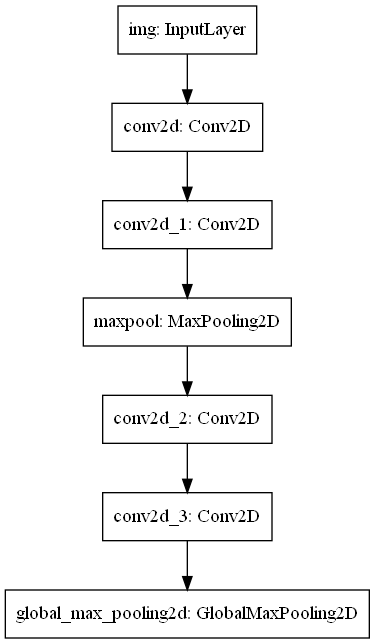

In [17]:
tf.keras.utils.plot_model(encoder)

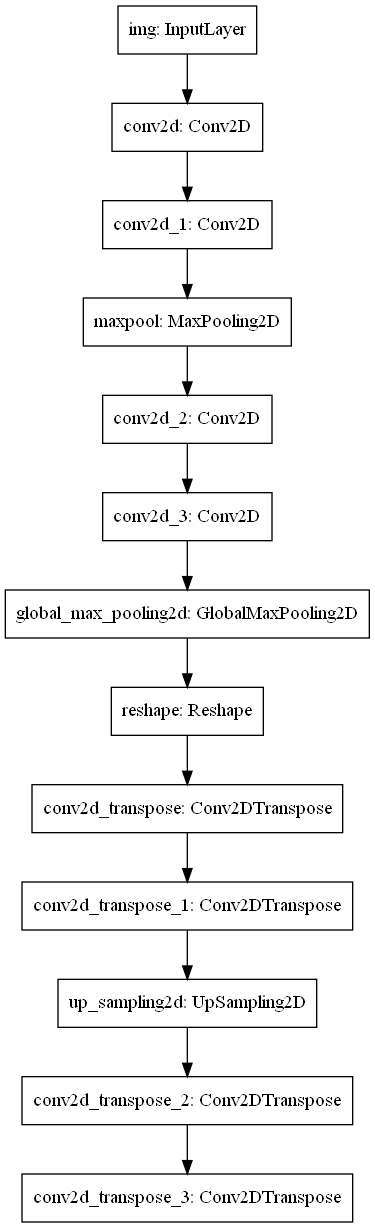

In [18]:
tf.keras.utils.plot_model(autoencoder)

## All models are callable, just like layers

You can treat any model as if it were a layer by invoking it on an Input or on the output of another layer. By calling a model you aren't just reusing the architecture of the model, you're also reusing its weights.

In [19]:
# encoder
encoder_input = tf.keras.layers.Input(shape = (28,28,1),name = 'original_img')
x = tf.keras.layers.Conv2D(16,3,padding = "valid",activation = 'relu')(encoder_input)
x = tf.keras.layers.Conv2D(32,3,activation = 'relu')(x)
x = tf.keras.layers.MaxPooling2D(3)(x)
x = tf.keras.layers.Conv2D(32,3,activation = 'relu')(x)
x = tf.keras.layers.Conv2D(16,3,activation = 'relu')(x)
encoder_output = tf.keras.layers.GlobalMaxPooling2D()(x)
encoder  = tf.keras.Model(encoder_input,encoder_output,name = 'encoder')
encoder.summary()
# decoder
decoder_input = tf.keras.layers.Input(shape = (16,),name = 'encoded_img')
x = tf.keras.layers.Reshape((4,4,1))(decoder_input)
x = tf.keras.layers.Conv2DTranspose(16,3,activation = 'relu')(x)
x = tf.keras.layers.Conv2DTranspose(32,3,activation = 'relu')(x)
x = tf.keras.layers.UpSampling2D(3)(x)
x = tf.keras.layers.Conv2DTranspose(16,3,activation = "relu")(x)
decoder_output = tf.keras.layers.Conv2DTranspose(1,3,activation = 'relu')(x)
decoder = tf.keras.Model(decoder_input,decoder_output)
decoder.summary()
# autoencoder
autoencoder_input = tf.keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = tf.keras.Model(autoencoder_input,decoded_img,name = 'autoencoder')
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

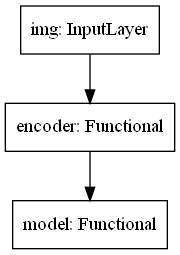

In [20]:
tf.keras.utils.plot_model(autoencoder)

As you can see, the model can be nested: a model can contain sub-models (since a model is just like a layer). A common use case for model nesting is ensembling. For example, here's how to ensemble a set of models into a single model that averages their predictions

In [21]:
def get_model():
    inputs = tf.keras.layers.Input(shape = (128,))
    outputs = tf.keras.layers.Dense(1)(inputs)
    return tf.keras.Model(inputs,outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = tf.keras.Input(shape = (128,))

y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)

outputs = tf.keras.layers.average([y1,y2,y3])

ensemble_model = tf.keras.Model(inputs =inputs,outputs = outputs)

ensemble_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
model_1 (Functional)            (None, 1)            129         input_6[0][0]                    
__________________________________________________________________________________________________
model_2 (Functional)            (None, 1)            129         input_6[0][0]                    
__________________________________________________________________________________________________
model_3 (Functional)            (None, 1)            129         input_6[0][0]                    
____________________________________________________________________________________________

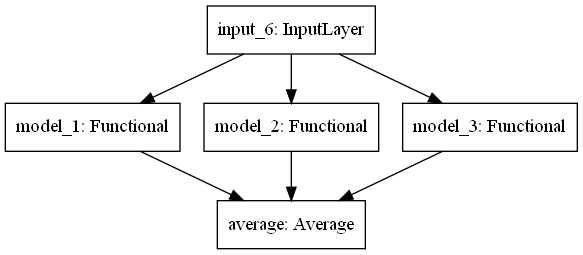

In [23]:
tf.keras.utils.plot_model(ensemble_model)

In [73]:
x = np.random.rand(128,)
x = tf.convert_to_tensor(x)
x = tf.expand_dims(x,axis =0)
y = ensemble_model(x)
y

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.37040636]], dtype=float32)>

## Models with multiple inputs and outputs
The functional API makes it easy to manipulate multiple inputs and outputs. This cannot be handled with the Sequential API.

For example, if you're building a system for ranking customer issue tickets by priority and routing them to the correct department, then the model will have three inputs:

- the title of the ticket (text input),
- the text body of the ticket (text input), and
- any tags added by the user (categorical input)

This model will have two outputs:

- the priority score between 0 and 1 (scalar sigmoid output), and
- the department that should handle the ticket (softmax output over the set of departments).

You can build this model in a few lines with the functional API:

In [95]:
num_tags = 12 # Number of unique issue tags
num_words = 10000 # Size if vocabulary obtained when preprocessing text data
num_departments = 4 # Number of departments for predictions

title_input = tf.keras.layers.Input(shape = (None,),name = 'title') # Variable-length sequence of ints
body_input = tf.keras.layers.Input(shape = (None,),name = 'body') # Variable-length sequence of ints
tags_input= tf.keras.layers.Input(shape = (num_tags,),name = 'tags') # Binary vector of size 'num_tags'

# Embed each word in the title into 64-dimensional vector
title_features = tf.keras.layers.Embedding(num_words,64)(title_input)
# Embed each word in the text into 64-dimensional vector
body_features = tf.keras.layers.Embedding(num_words,64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = tf.keras.layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = tf.keras.layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = tf.keras.layers.concatenate([title_features,body_features,tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = tf.keras.layers.Dense(1,name = 'priority')(x)
# Stick a department classifier on top of the features
department_pred = tf.keras.layers.Dense(num_departments,name = 'department')(x)

# Instantiate an end-to-end model predicting both priority and department
model = tf.keras.Model(inputs = [title_input,body_input,tags_input], 
                       outputs = [priority_pred,department_pred],
                      )

In [96]:
# summary the model
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, None, 64)     640000      title[0][0]                      
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, None, 64)     640000      body[0][0]                       
____________________________________________________________________________________________

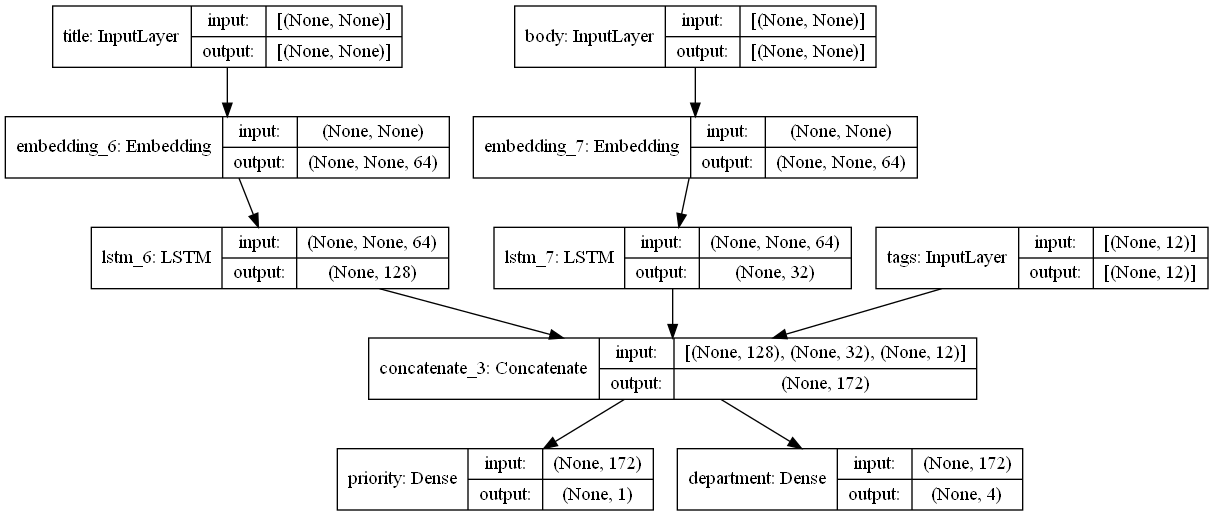

In [97]:
# Plot the model
tf.keras.utils.plot_model(model,"multi_input_and_output_model.png",show_shapes = True)

When compiling this model, you can assign different losses to each output. You can even assign different weights to each loss -- to modulate their contribution to the total training loss.

In [98]:
model.compile(
optimizer = tf.keras.optimizers.RMSprop(1e-3),
loss = [
    tf.keras.losses.BinaryCrossentropy(from_logits = True),
    tf.keras.losses.CategoricalCrossentropy(from_logits = True)
],
loss_weights = [1.0,0.2]
)

In [99]:
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(1e-3),
    loss = {
    "priority": tf.keras.losses.BinaryCrossentropy(from_logits = True),
    "department": tf.keras.losses.CategoricalCrossentropy(from_logits = True)
},
    loss_weights = {
        "priority": 1.0,
        "department": 0.2
    }
)

In [100]:
# Train the model by passing list of Numpy arrays of inputs and target
# Dummy input data
title_data = np.random.randint(num_words,size = (1280,10))
body_data = np.random.randint(num_words,size = (1280,10))
tags_data = np.random.randint(2,size = (1280,num_tags)).astype("float32")
print(f"title_data: {title_data[0]}")
print(f"body_data: {body_data[0]}")
print(f"tags_data: {tags_data[0]}")
# Dummy target data
priority_targets = np.random.random(size = (1280,1))
dept_targets = np.random.randint(2,size = (1280,num_departments))
print(f"prioriry_data: {priority_targets[0]}")
print(f"dept_target: {dept_targets[0]}")

title_data: [8627 1408 7454 5719 8054 7380  787 1943  802 1413]
body_data: [3513 1370 9769 9443 9746 4715 3904 6622  922 8930]
tags_data: [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
prioriry_data: [0.29766668]
dept_target: [0 0 0 0]


In [101]:
# Train the model
model.fit(
            {"title":title_data,
             "body": body_data,
             "tags": tags_data
            },
            {"priority":priority_targets,
             "department":dept_targets
            },
            epochs = 2,
            batch_size = 32
)

Epoch 1/2
40/40 [==============================] - 5s 28ms/step - loss: 1.3056 - priority_loss: 0.7108 - department_loss: 2.9739
Epoch 2/2
40/40 [==============================] - 1s 30ms/step - loss: 1.2809 - priority_loss: 0.6996 - department_loss: 2.9061


## A toy ResNet model
In addition to models with multiple inputs and outputs, the functional API makes it easy to manipulate non-linear connectivity topologies -- these are models with layers that are not connected sequentially, which the Sequential API cannot handle.

A common use case for this is residual connections. Let's build a toy ResNet model for CIFAR10 to demonstrate this:

In [106]:
inputs = tf.keras.layers.Input(shape = (32,32,3),name= "img")
x = tf.keras.layers.Conv2D(32,3,activation = 'relu')(inputs)
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(x)
block_1_output = tf.keras.layers.MaxPooling2D(3)(x)

x = tf.keras.layers.Conv2D(64,3,activation ="relu",padding= "same")(block_1_output)
x = tf.keras.layers.Conv2D(64,3,activation = 'relu',padding = 'same')(x)
block_2_output = tf.keras.layers.add([x,block_1_output])

x = tf.keras.layers.Conv2D(64,3,activation ="relu",padding= "same")(block_2_output)
x = tf.keras.layers.Conv2D(64,3,activation = 'relu',padding = 'same')(x)
block_3_output = tf.keras.layers.add([x,block_2_output])

x = tf.keras.layers.Conv2D(64,3,activation = "relu")(block_3_output)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256,activation ="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10)(x)

model = tf.keras.Model(inputs,outputs,name = 'toy_resnet')
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_27[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_28[0][0]                  
_________________________________________________________________________________________

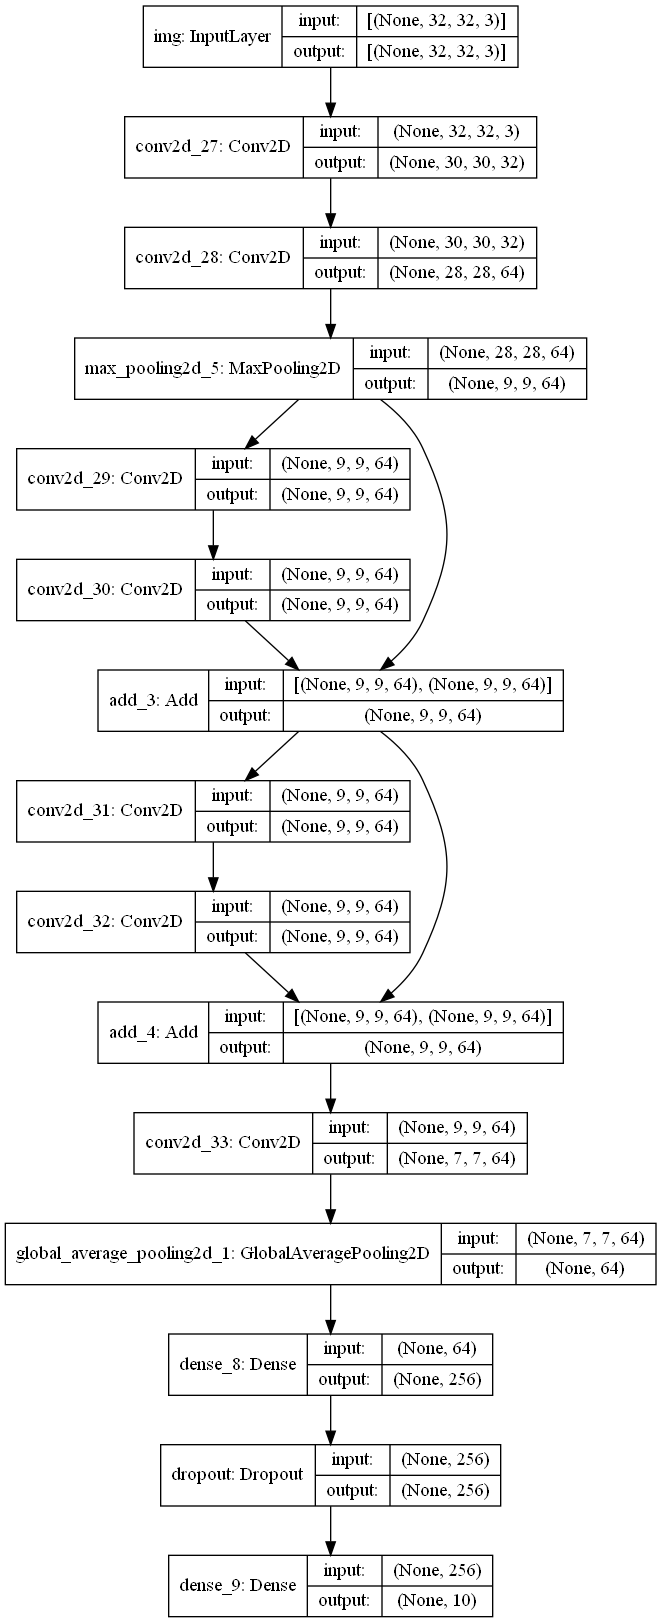

In [108]:
tf.keras.utils.plot_model(model,"mini_resnet.png",show_shapes = True)

In [110]:
# Download the dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
# Preprocess data
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)
print(f"x_train: {x_train[0]}")
print(f"x_test: {x_test[0]}")
print(f"y_train: {y_train[0]}")
print(f"y_test: {y_test[0]}")

x_train: [[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.1

In [112]:
# compile the model
model.compile(optimizer = tf.keras.optimizers.RMSprop(1e-3),
             loss = tf.keras.losses.CategoricalCrossentropy(from_logits= True),
             metrics = ['acc'])

In [114]:
# We restrict the data to first 1000 samples so as to limit execution time
model.fit(x_train[:1000],y_train[:1000],batch_size = 32,epochs = 10,validation_split = 0.2)

Epoch 1/10
25/25 [==============================] - 7s 293ms/step - loss: 2.2268 - acc: 0.1513 - val_loss: 2.2230 - val_acc: 0.1300
Epoch 2/10
25/25 [==============================] - 9s 350ms/step - loss: 2.2181 - acc: 0.1775 - val_loss: 2.1447 - val_acc: 0.2200
Epoch 3/10
25/25 [==============================] - 9s 338ms/step - loss: 2.1552 - acc: 0.1912 - val_loss: 2.3802 - val_acc: 0.1100
Epoch 4/10
25/25 [==============================] - 10s 422ms/step - loss: 2.0865 - acc: 0.2000 - val_loss: 1.9954 - val_acc: 0.2300
Epoch 5/10
25/25 [==============================] - 9s 373ms/step - loss: 2.0789 - acc: 0.2138 - val_loss: 1.9874 - val_acc: 0.2600
Epoch 6/10
25/25 [==============================] - 10s 394ms/step - loss: 2.0546 - acc: 0.1988 - val_loss: 1.9943 - val_acc: 0.2350
Epoch 7/10
25/25 [==============================] - 9s 373ms/step - loss: 1.9797 - acc: 0.2587 - val_loss: 1.9269 - val_acc: 0.2450
Epoch 8/10
25/25 [==============================] - 8s 334ms/step - loss: 

## Shared layers
Another good use for the functional API are models that use shared layers. Shared layers are layer instances that are reused multiple times in the same model -- they learn features that correspond to multiple paths in the graph-of-layers.

Shared layers are often used to encode inputs from similar spaces (say, two different pieces of text that feature similar vocabulary). They enable sharing of information across these different inputs, and they make it possible to train such a model on less data. If a given word is seen in one of the inputs, that will benefit the processing of all inputs that pass through the shared layer.

To share a layer in the functional API, call the same layer instance multiple times. For instance, here's an Embedding layer shared across two different text inputs

In [115]:
# Embedding for 1000 unique words mapped to 128-dimensional vectors
shared_embedding = tf.keras.layers.Embedding(1000,128)

# Variable-length sequence of integers
text_input_a = tf.keras.layers.Input(shape = (None,),dtype = 'int32')
# Variable-length sequence of integers
text_input_b = tf.keras.layers.Input(shape = (None,),dtype = 'int32')

# Reuse the same layer to encoder both inputs
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

## Extract and reuse nodes in the graph of layers
Because the graph of layers you are manipulating is a static data structure, it can be accessed and inspected. And this is how you are able to plot functional models as images.

This also means that you can access the activations of intermediate layers ("nodes" in the graph) and reuse them elsewhere -- which is very useful for something like feature extraction.

Let's look at an example. This is a VGG19 model with weights pretrained on ImageNet

In [116]:
vgg19 = tf.keras.applications.VGG19()

574726144/574710816 [==============================] - 172s 0us/step


In [118]:
features_list = [layer.output for layer in vgg19.layers]
features_list

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_9')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv4')>,

In [119]:
feat_extraction_model = tf.keras.Model(inputs = vgg19.input,outputs= features_list)
feat_extraction_model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

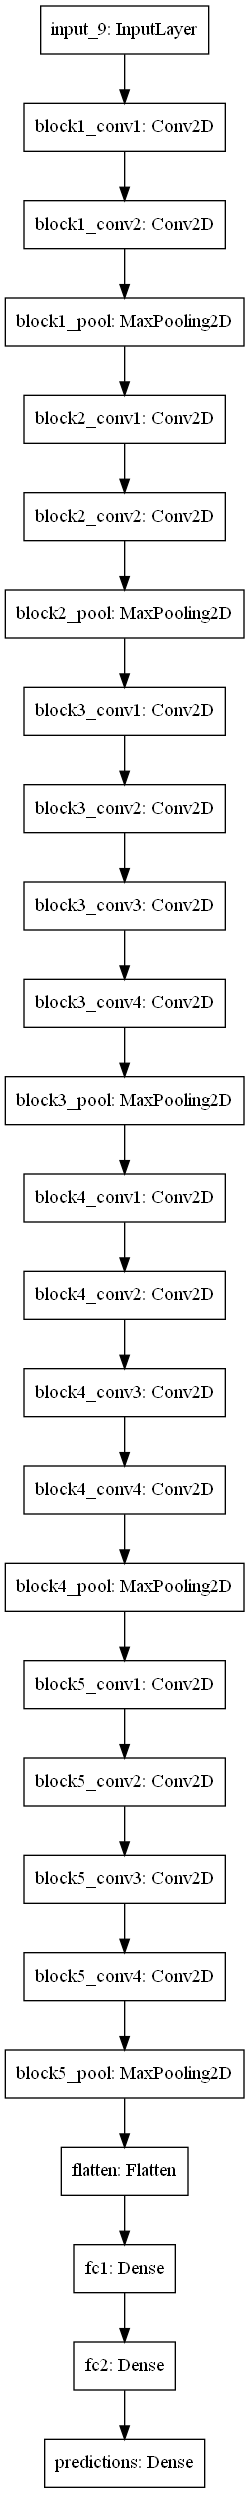

In [120]:
tf.keras.utils.plot_model(feat_extraction_model)

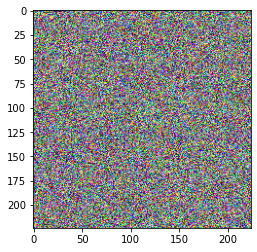

In [123]:
import matplotlib.pyplot as plt
img = np.random.random((1,224,224,3)).astype('float32')
plt.imshow(img[0])

In [127]:
extracted_features = feat_extraction_model(img)
print(len(extracted_features))
extracted_features

26


[<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
 array([[[[0.51777554, 0.10405055, 0.574261  ],
          [0.8252734 , 0.22762911, 0.5987087 ],
          [0.7101461 , 0.1888992 , 0.33912742],
          ...,
          [0.18669912, 0.626065  , 0.01604625],
          [0.6618887 , 0.9647034 , 0.59244967],
          [0.5272224 , 0.28731063, 0.17352884]],
 
         [[0.4964807 , 0.5193624 , 0.02982253],
          [0.00324094, 0.7522179 , 0.28708953],
          [0.43948424, 0.26496264, 0.3317024 ],
          ...,
          [0.59002346, 0.7176479 , 0.02417587],
          [0.20498483, 0.8352063 , 0.19565876],
          [0.19953181, 0.24596485, 0.25825533]],
 
         [[0.16428539, 0.30621058, 0.06567692],
          [0.5403173 , 0.72662824, 0.49381274],
          [0.2227407 , 0.34643537, 0.82474566],
          ...,
          [0.32001698, 0.53969675, 0.04307515],
          [0.8963115 , 0.13145444, 0.52060306],
          [0.9556632 , 0.08904813, 0.48454845]],
 
         ...,
 
       

## Extend the API using custom layers
tf.keras includes a wide range of built-in layers, for example:

- Convolutional layers: Conv1D, Conv2D, Conv3D, Conv2DTranspose
- Pooling layers: MaxPooling1D, MaxPooling2D, MaxPooling3D, AveragePooling1D
- RNN layers: GRU, LSTM, ConvLSTM2D
- BatchNormalization, Dropout, Embedding, etc.

But if you don't find what you need, it's easy to extend the API by creating your own layers. All layers subclass the Layer class and implement:

- call method, that specifies the computation done by the layer.
- build method, that creates the weights of the layer (this is just a style convention since you can create weights in __init__, as well).

To learn more about creating layers from scratch, read custom layers and models guide.

The following is a basic implementation of tf.keras.layers.Dense:

In [132]:
dir(tf.keras.layers)

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalMaxPool1D',
 'GlobalM

In [133]:
dir(tf.keras.layers.Layer)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_autographed_call',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_cast_single_input',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compute_dtype',
 '_dedup_weights',
 '_deferred_dependencies',
 '_delete_tracking',
 '_dtype',
 '_eager_losses',
 '_flatten',
 '_flatten_layers',
 '_flatten_modules',
 '_functional_construction_call',
 '_gather_children_attribute',
 '_gather_saveables_for

In [131]:
class CustomDense(tf.keras.layers.Layer):
    def __init__(self,units = 32):
        super(CustomDense,self).__init__()
        self.units = units
    def build(self,input_shape):
        self.w = self.add_weight(
            shape = (input_shape[-1],self.units),
            initializer ='random_normal',
            trainable = True
        )
        self.b = self.add_weight(
        shape = (self.units,),initializer = 'random_normal',trainable = True)
    def call(self, inputs):
        return tf.matmul(inputs,self.w) + self.b

inputs = tf.keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = tf.keras.Model(inputs,outputs)
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
custom_dense (CustomDense)   (None, 10)                50        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [134]:
class CustomDense(tf.keras.layers.Layer):
    def __init__(self,units =32):
        super(CustomDense,self).__init__()
        self.units =units
    def build(self,input_shape):
        self.w = self.add_weight(
            shape = (input_shape[-1],self.units),
            initializer = 'random_normal',
            trainable = True
        )
        self.b = self.add_weight(
        shape = (self.units,),initializer = 'random_normal',trainable = True
        )
    def call(self,inputs):
        return tf.matmul(inputs,self.w) + self.b
    
    def get_config(self):
        return {"units":self.units}
    
inputs = tf.keras.layers.Input((4,))
outputs = CustomDense(10)(inputs)

model = tf.keras.Model(inputs,outputs)
model.summary()

config = model.get_config()

new_model =  tf.keras.Model.from_config(config,custom_objects = {"CustomDense":CustomDense})
new_model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
custom_dense_1 (CustomDense) (None, 10)                50        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
custom_dense_2 (CustomDense) (None, 10)                50        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


Optionally, implement the class method from_config(cls, config) which is used when recreating a layer instance given its config dictionary. The default implementation of from_config is

In [135]:
def from_config(cls,config):
    return cls(**config)

## Model subclassing

**When to use the functional API :**

Should you use the Keras functional API to create a new model, or just subclass the Model class directly? In general, the functional API is higher-level, easier and safer, and has a number of features that subclassed models do not support.

However, model subclassing provides greater flexibility when building models that are not easily expressible as directed acyclic graphs of layers. For example, you could not implement a Tree-RNN with the functional API and would have to subclass Model directly.

For an in-depth look at the differences between the functional API and model subclassing, read What are Symbolic and Imperative APIs in TensorFlow 2.0?.

Functional API strengths:
The following properties are also true for Sequential models (which are also data structures), but are not true for subclassed models (which are Python bytecode, not data structures).

Less verbose
There is no super(MyClass, self).__init__(...), no def call(self, ...):, etc.

Compare:

In [138]:
inputs = tf.keras.layers.Input(shape = (32,))
x = tf.keras.layers.Dense(64,activation = 'relu')(inputs)
outputs = tf.keras.layers.Dense(10)(x)
mlp = tf.keras.Model(inputs,outputs)
mlp.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 2,762
Trainable params: 2,762
Non-trainable params: 0
_________________________________________________________________


In [141]:
class MLP(tf.keras.Model):
    def __init__(self,**kwargs):
        super(MLP,self).__init__(**kwargs)
        self.dense_1 = tf.keras.layers.Dense(64,activation = 'relu')
        self.dense_2 = tf.keras.layers.Dense(10)
    def call(self,inputs):
        x = self.dense_1(inputs)
        return self.dense_2(x)
    
# Instantiate the model
mlp = MLP()

# Necessary to create the model's state
# The model doesn't have a state until it's called at least once
_ = mlp(tf.zeros((1,32)))

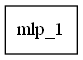

In [144]:
tf.keras.utils.plot_model(mlp)

## Mix-and-match API styles
Choosing between the functional API or Model subclassing isn't a binary decision that restricts you into one category of models. All models in the tf.keras API can interact with each other, whether they're Sequential models, functional models, or subclassed models that are written from scratch.

You can always use a functional model or Sequential model as part of a subclassed model or layer:

In [160]:
units = 32
timesteps = 10
input_dim = 5

# Define a Functional model
inputs = tf.keras.layers.Input((None,units))
x = tf.keras.layers.GlobalAveragePooling1D()(inputs)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs,outputs)

# Define a subclass model
class CustomRNN(tf.keras.layers.Layer):
    def __init__(self):
        super(CustomRNN,self).__init__()
        self.units =units
        self.projection_1 = tf.keras.layers.Dense(units = units, activation = 'tanh')
        self.projection_2 = tf.keras.layers.Dense(units = units, activation = 'tanh')
        # Our previously-defined Functional model
        self.classifier = model # Use functional model or sequential model as a part of subclassed model
    
    def call(self,inputs):
        outputs = []
        state = tf.zeros(shape = (inputs.shape[0],self.units))
        for t in range(inputs.shape[1]):
            x = inputs[:,t,:] # tf.keras.layers.Input((None,units))
            h = self.projection_1(x)
            y = h + self.projection_2(state)
            state = y
            outputs.append(y)
        features = tf.stack(outputs,axis = 1)
        print(f"features.shape: {features.shape}")
        return self.classifier(features)

rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, timesteps, input_dim)))

# Summary model
rnn_model.summary()

features.shape: (1, 10, 32)


AttributeError: 'CustomRNN' object has no attribute 'summary'

In [169]:
# tf.keras.utils.plot_model(rnn_model)

In [165]:
inputs = tf.zeros((1,timesteps,input_dim))
print(inputs.shape)
inputs

(1, 10, 5)


<tf.Tensor: shape=(1, 10, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [167]:
state = tf.zeros(shape = (inputs.shape[0],units))
print(state.shape)
state

(1, 32)


<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

You can use any subclassed layer or model in the functional API as long as it implements a call method that follows one of the following patterns:

- `call(self, inputs, **kwargs)` -- Where `inputs` is a tensor or a nested structure of tensors (e.g. a list of tensors), and where **kwargs are non-tensor arguments (non-inputs).

- `call(self, inputs, training=None, **kwargs)` -- Where `training` is a boolean indicating whether the layer should behave in training mode and inference mode.

- `call(self, inputs, mask=None, **kwargs)` -- Where `mask` is a boolean mask tensor (useful for RNNs, for instance).

- `call(self, inputs, training=None, mask=None, **kwargs)` -- Of course, you can have both masking and training-specific behavior at the same time.

Additionally, if you implement the `get_config` method on your custom Layer or model, the functional models you create will still be serializable and cloneable.

Here's a quick example of a custom RNN, written from scratch, being used in a functional model:

In [173]:
units = 32
timesteps = 10
input_dim = 5
batch_size = 16

class CustomRNN(tf.keras.layers.Layer):
    def __init__(self):
        super(CustomRNN,self).__init__()
        self.units = units
        self.projection_1 = tf.keras.layers.Dense(units = units,activation = 'tanh')
        self.projection_2 = tf.keras.layers.Dense(units = units,activation = 'tanh')
        self.classifier = tf.keras.layers.Dense(1) 
    
    def call(self,inputs):
        outputs = []
        state = tf.zeros(shape = (inputs.shape[0],self.units))
        for t in range(inputs.shape[1]):
            x = inputs[:,t,:]
            h = self.projection_1(x)
            y = h + self.projection_2(state)
            state = y
            outputs.append(y)
        features = tf.stack(outputs,axis = 1)
        return self.classifier(features)
    
# Note that you specify a static batch size for inputs with the `batch_size`
# arg, because the inner computation of `CustomRNN` requires a static batch_size
# (when you create the `state` zeros tensor)
inputs = tf.keras.layers.Input(batch_shape = (batch_size,timesteps,input_dim))
x = tf.keras.layers.Conv1D(32,3)(inputs)
outputs = CustomRNN()(x)
# Model
model = tf.keras.Model(inputs,outputs)
rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1,10,5)))


### Reference

https://keras.io/guides/making_new_layers_and_models_via_subclassing/

https://keras.io/guides/training_with_built_in_methods/